In [62]:
#What is the type of the input and output variables?
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
db=pd.read_csv("diabetes.csv")
db.head()
#the result show clearly that the input and output variables are numerical
db


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [11]:
#What is the most suited method for feature selection for these types of variables?
#the filter methods with the correlation coefficient 

In [13]:
db.shape


(768, 9)

In [14]:
#Create a notebook and perform feature selection on the dataset
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
#here we do have only numerical variables so no need to remove any of them
db.corr()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<AxesSubplot:>

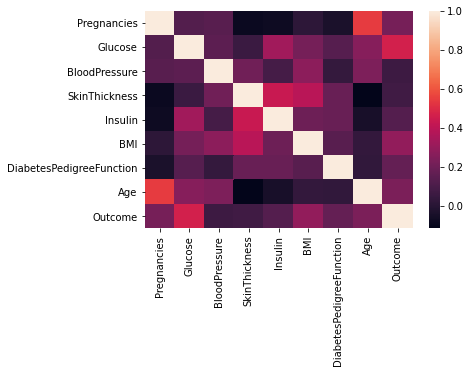

In [16]:
sns.heatmap(db.corr())

In [59]:
X=db[list(db.columns)]
Y=db.iloc[:,2].values

In [60]:
#Create a data set copy with all the input features after converting them to numeric including target variable
full_data= X.copy()
full_data["BloodPressure"]= Y
print(full_data.head(2))

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  


In [63]:
imp = full_data.drop("BloodPressure", axis=1).apply(lambda x: x.corr(full_data.BloodPressure))
print(imp)
indices = np.argsort(imp)
print(indices)
print(imp[indices])     #Sorted in ascending order

Pregnancies                 0.141282
Glucose                     0.152590
SkinThickness               0.207371
Insulin                     0.088933
BMI                         0.281805
DiabetesPedigreeFunction    0.041265
Age                         0.239528
Outcome                     0.065068
dtype: float64
Pregnancies                 5
Glucose                     7
SkinThickness               3
Insulin                     0
BMI                         1
DiabetesPedigreeFunction    2
Age                         6
Outcome                     4
dtype: int64
DiabetesPedigreeFunction    0.041265
Outcome                     0.065068
Insulin                     0.088933
Pregnancies                 0.141282
Glucose                     0.152590
SkinThickness               0.207371
Age                         0.239528
BMI                         0.281805
dtype: float64


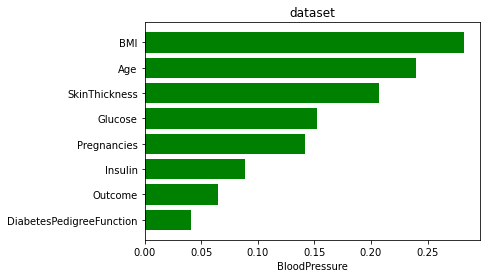

In [65]:
names=['Pregnancies','Glucose','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']
plt.title('dataset')

#Plotting horizontal bar graph
plt.barh(range(len(indices)), imp[indices], color='g', align='center')
plt.yticks(range(len(indices)), [names[i] for i in indices])
plt.xlabel('BloodPressure')
plt.show()

In [69]:
for i in range(0, len(indices)):
    if np.abs(imp[i])>0.4:
        print(names[i])
    else:
        print("no")

no
no
no
no
no
no
no
no


In [68]:
for i in range(len(X.columns)):
    for j in  range(len(X.columns)):
        if i!=j:
            corr_1=np.abs(X[X.columns[i]].corr(X[X.columns[j]]))
            if corr_1 <0.3:
                print( X.columns[i] , " is not correlated  with ", X.columns[j])
            elif corr_1>0.75:
                print( X.columns[i] , " is highly  correlated  with ", X.columns[j])


Pregnancies  is not correlated  with  Glucose
Pregnancies  is not correlated  with  BloodPressure
Pregnancies  is not correlated  with  SkinThickness
Pregnancies  is not correlated  with  Insulin
Pregnancies  is not correlated  with  BMI
Pregnancies  is not correlated  with  DiabetesPedigreeFunction
Pregnancies  is not correlated  with  Outcome
Glucose  is not correlated  with  Pregnancies
Glucose  is not correlated  with  BloodPressure
Glucose  is not correlated  with  SkinThickness
Glucose  is not correlated  with  BMI
Glucose  is not correlated  with  DiabetesPedigreeFunction
Glucose  is not correlated  with  Age
BloodPressure  is not correlated  with  Pregnancies
BloodPressure  is not correlated  with  Glucose
BloodPressure  is not correlated  with  SkinThickness
BloodPressure  is not correlated  with  Insulin
BloodPressure  is not correlated  with  BMI
BloodPressure  is not correlated  with  DiabetesPedigreeFunction
BloodPressure  is not correlated  with  Age
BloodPressure  is not

In [ ]:
#We can see that no column is highly correlated with the other one , so we won't drop any one of them 